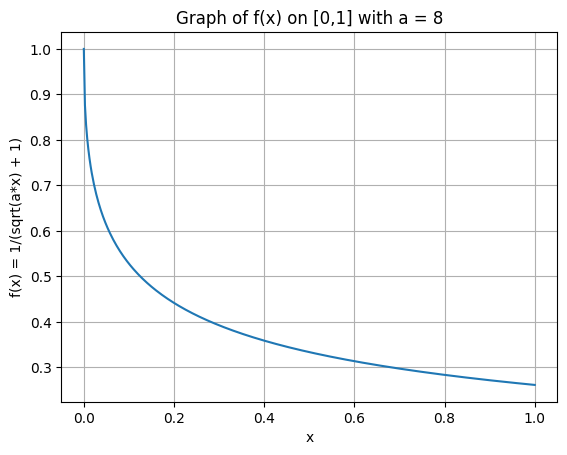

(b) Estimated area (numerical integration): 0.371493
(c) Exact area (formula): 0.371493


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

a = 8   # last digit of student number

# ----- Function -----
def f(x, a):
    return 1 / (np.sqrt(a * x) + 1)

# ----- (a) Plot on [0,1] -----
x_vals = np.linspace(0, 1, 400)
y_vals = f(x_vals, a)

plt.plot(x_vals, y_vals)
plt.xlabel("x")
plt.ylabel("f(x) = 1/(sqrt(a*x) + 1)")
plt.title(f"Graph of f(x) on [0,1] with a = {a}")
plt.grid(True)
plt.show()

# ----- (b) Numerical area estimate -----
area, error = quad(f, 0, 1, args=(a,))
print(f"(b) Estimated area (numerical integration): {area:.6f}")

# ----- (c) Exact formula check -----
# ∫_0^1 dx / (1 + sqrt(a x)) = (2/a) * ( sqrt(a) - ln(1 + sqrt(a)) )
exact_area = (2/a) * (np.sqrt(a) - np.log(1 + np.sqrt(a)))
print(f"(c) Exact area (formula): {exact_area:.6f}")

(b) Intersections: x1 = 0.000000, x2 = 1.494693
(c) Area between curves: 1.482459
(d) Volume about y-axis: 6.295229


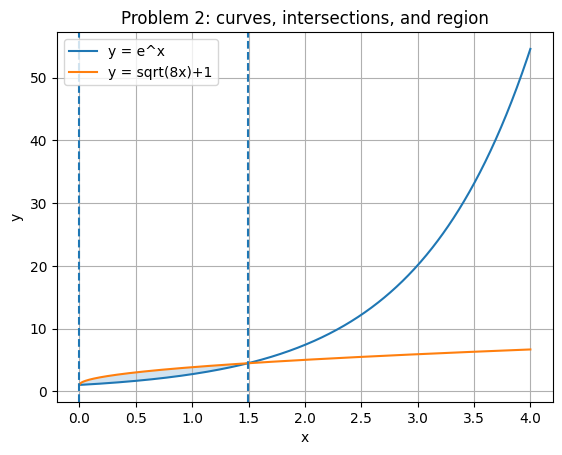

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import brentq

# ----- parameters -----
a = 8

# ----- functions -----
g = lambda x: np.exp(x)
h = lambda x: np.sqrt(a*x) + 1.0
diff = lambda x: g(x) - h(x)

# (b) intersections
def intersections(xmin=0.0, xmax=8.0, n=1600):
    xs = np.linspace(xmin, xmax, n+1)
    ys = diff(xs)
    roots = []
    for i in range(n):
        if np.sign(ys[i]) == 0:
            roots.append(xs[i])
        elif np.sign(ys[i]) != np.sign(ys[i+1]):
            roots.append(brentq(diff, xs[i], xs[i+1]))
    roots = sorted(r for r in roots if r >= 0)
    if len(roots) < 2: raise RuntimeError("Need two intersections; widen the range.")
    return roots[0], roots[1]

x1, x2 = intersections()
area_between, _ = quad(lambda x: abs(diff(x)), x1, x2)                 # (c)
volume_y, _     = quad(lambda x: 2*np.pi * x * abs(diff(x)), x1, x2)   # (d)

print(f"(b) Intersections: x1 = {x1:.6f}, x2 = {x2:.6f}")
print(f"(c) Area between curves: {area_between:.6f}")
print(f"(d) Volume about y-axis: {volume_y:.6f}")

# (a) graph + region
xplot = np.linspace(0, max(4, x2+1), 600)
plt.plot(xplot, g(xplot), label="y = e^x")
plt.plot(xplot, h(xplot), label=f"y = sqrt({a}x)+1")
xp = np.linspace(x1, x2, 400)
plt.fill_between(xp, np.minimum(g(xp), h(xp)), np.maximum(g(xp), h(xp)), alpha=0.2)
plt.axvline(x1, ls="--"); plt.axvline(x2, ls="--")
plt.xlabel("x"); plt.ylabel("y"); plt.title("Problem 2: curves, intersections, and region")
plt.grid(True); plt.legend(); plt.show()

In [1]:
import sympy as sp

# ----- Parameters -----
a = 8   # last digit (if 0, use 10)

# ----- Symbols -----
x, n = sp.symbols('x n', positive=True)

# ----- (a) Antiderivative for n=a using reduction formula -----
def A(k):
    """Antiderivative of (ln x)^k via reduction formula"""
    if k == 0:
        return x
    return x*sp.log(x)**k - k*A(k-1)

F_a = sp.simplify(A(a))   # antiderivative when n=a

# ----- (b) Why reduction formula is useful -----
# Instead of repeating integration by parts k times,
# it reduces ∫(ln x)^k dx to ∫(ln x)^(k-1) dx recursively.

# ----- (c) Proof by differentiation -----
# RHS of the reduction formula:
F_n = x*sp.log(x)**n - n*sp.integrate(sp.log(x)**(n-1), x)
proof = sp.simplify(sp.diff(F_n, x) - sp.log(x)**n)  # should be 0

# ----- Display results -----
print("=== Problem 3 Results ===")
print(f"(a) Antiderivative for n=a={a}:")
print(F_a)
print("\n(b) The reduction formula is preferred because it reuses A(n-1) recursively,")
print("    instead of redoing integration by parts each time.")
print("\n(c) Proof check: derivative of RHS - (ln x)^n =", proof)

=== Problem 3 Results ===
(a) Antiderivative for n=a=8:
x*(log(x)**8 - 8*log(x)**7 + 56*log(x)**6 - 336*log(x)**5 + 1680*log(x)**4 - 6720*log(x)**3 + 20160*log(x)**2 - 40320*log(x) + 40320)

(b) The reduction formula is preferred because it reuses A(n-1) recursively,
    instead of redoing integration by parts each time.

(c) Proof check: derivative of RHS - (ln x)^n = 0
